In [1]:
import os
import sys

#Set the path for Spark installation
os.environ['SPARK_HOME'] = "C:/spark"

#append to python path so that pyspark could be found
sys.path.append("C:/spark/bin")
sys.path.append("C:/spark/python")
sys.path.append("C:/spark/python/pyspark")
sys.path.append("C:/spark/python/lib")
sys.path.append("C:/spark/python/lib/pyspark.zip")
sys.path.append("C:/spark/python/lib/py4j-0.10.4-src.zip")
sys.path.append("C:/java/bin")

In [3]:
from __future__ import print_function
import pandas as panda
import numpy as nump
from matplotlib import pyplot as matplt
import seaborn as sb
%matplotlib inline

In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

In [5]:
spark = SparkSession.builder.getOrCreate()

In [6]:
path1 = "/Users/dheer/Documents/DengAI/dengue_features_train.csv"
train_features = spark.read.option("header", "true").option("inferSchema", "true").csv(path1)

path2 = "/Users/dheer/Documents/DengAI/dengue_labels_train.csv"
train_labels = spark.read.option("header", "true").option("inferSchema", "true").csv(path2)

path3 = "/Users/dheer/Documents/DengAI/dengue_features_test.csv"
test_features = spark.read.option("header", "true").option("inferSchema", "true").csv(path3)

In [7]:
train_labels = train_labels.select(train_labels.city.alias("city_l"),
                            train_labels.year.alias("year_l"),
                            train_labels.weekofyear.alias("weekofyear_l"),
                            train_labels.total_cases.alias("total_cases"))

In [8]:
train = train_features.join(train_labels,
                            ((train_features.city == train_labels.city_l) &
                             (train_features.year == train_labels.year_l) &
                             (train_features.weekofyear == train_labels.weekofyear_l)), 'inner')

In [9]:
train = train.drop("city_l", "year_l", "weekofyear_l")

In [10]:
print ((train.count(), len(train.dtypes)))

(1456, 25)


In [11]:
train.dtypes

[('city', 'string'),
 ('year', 'int'),
 ('weekofyear', 'int'),
 ('week_start_date', 'timestamp'),
 ('ndvi_ne', 'double'),
 ('ndvi_nw', 'double'),
 ('ndvi_se', 'double'),
 ('ndvi_sw', 'double'),
 ('precipitation_amt_mm', 'double'),
 ('reanalysis_air_temp_k', 'double'),
 ('reanalysis_avg_temp_k', 'double'),
 ('reanalysis_dew_point_temp_k', 'double'),
 ('reanalysis_max_air_temp_k', 'double'),
 ('reanalysis_min_air_temp_k', 'double'),
 ('reanalysis_precip_amt_kg_per_m2', 'double'),
 ('reanalysis_relative_humidity_percent', 'double'),
 ('reanalysis_sat_precip_amt_mm', 'double'),
 ('reanalysis_specific_humidity_g_per_kg', 'double'),
 ('reanalysis_tdtr_k', 'double'),
 ('station_avg_temp_c', 'double'),
 ('station_diur_temp_rng_c', 'double'),
 ('station_max_temp_c', 'double'),
 ('station_min_temp_c', 'double'),
 ('station_precip_mm', 'double'),
 ('total_cases', 'int')]

In [12]:
train.select("week_start_date").show(5)

+--------------------+
|     week_start_date|
+--------------------+
|1990-04-30 00:00:...|
|1990-05-07 00:00:...|
|1990-05-14 00:00:...|
|1990-05-21 00:00:...|
|1990-05-28 00:00:...|
+--------------------+
only showing top 5 rows



In [13]:
train.printSchema()

root
 |-- city: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- weekofyear: integer (nullable = true)
 |-- week_start_date: timestamp (nullable = true)
 |-- ndvi_ne: double (nullable = true)
 |-- ndvi_nw: double (nullable = true)
 |-- ndvi_se: double (nullable = true)
 |-- ndvi_sw: double (nullable = true)
 |-- precipitation_amt_mm: double (nullable = true)
 |-- reanalysis_air_temp_k: double (nullable = true)
 |-- reanalysis_avg_temp_k: double (nullable = true)
 |-- reanalysis_dew_point_temp_k: double (nullable = true)
 |-- reanalysis_max_air_temp_k: double (nullable = true)
 |-- reanalysis_min_air_temp_k: double (nullable = true)
 |-- reanalysis_precip_amt_kg_per_m2: double (nullable = true)
 |-- reanalysis_relative_humidity_percent: double (nullable = true)
 |-- reanalysis_sat_precip_amt_mm: double (nullable = true)
 |-- reanalysis_specific_humidity_g_per_kg: double (nullable = true)
 |-- reanalysis_tdtr_k: double (nullable = true)
 |-- station_avg_temp_c: double (

In [14]:
train = train.withColumn("month", month("week_start_date"))
train = train.withColumn("dayofyear", dayofyear("week_start_date"))

In [15]:
train.printSchema()

root
 |-- city: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- weekofyear: integer (nullable = true)
 |-- week_start_date: timestamp (nullable = true)
 |-- ndvi_ne: double (nullable = true)
 |-- ndvi_nw: double (nullable = true)
 |-- ndvi_se: double (nullable = true)
 |-- ndvi_sw: double (nullable = true)
 |-- precipitation_amt_mm: double (nullable = true)
 |-- reanalysis_air_temp_k: double (nullable = true)
 |-- reanalysis_avg_temp_k: double (nullable = true)
 |-- reanalysis_dew_point_temp_k: double (nullable = true)
 |-- reanalysis_max_air_temp_k: double (nullable = true)
 |-- reanalysis_min_air_temp_k: double (nullable = true)
 |-- reanalysis_precip_amt_kg_per_m2: double (nullable = true)
 |-- reanalysis_relative_humidity_percent: double (nullable = true)
 |-- reanalysis_sat_precip_amt_mm: double (nullable = true)
 |-- reanalysis_specific_humidity_g_per_kg: double (nullable = true)
 |-- reanalysis_tdtr_k: double (nullable = true)
 |-- station_avg_temp_c: double (

In [16]:
train.select("month").show(5)

+-----+
|month|
+-----+
|    4|
|    5|
|    5|
|    5|
|    5|
+-----+
only showing top 5 rows



In [17]:
train.select("dayofyear").show(5)

+---------+
|dayofyear|
+---------+
|      120|
|      127|
|      134|
|      141|
|      148|
+---------+
only showing top 5 rows



In [18]:
train = train.drop("week_start_date")

In [19]:
train_pd = train.toPandas()

In [20]:
panda.isnull(train_pd).any()

city                                     False
year                                     False
weekofyear                               False
ndvi_ne                                   True
ndvi_nw                                   True
ndvi_se                                   True
ndvi_sw                                   True
precipitation_amt_mm                      True
reanalysis_air_temp_k                     True
reanalysis_avg_temp_k                     True
reanalysis_dew_point_temp_k               True
reanalysis_max_air_temp_k                 True
reanalysis_min_air_temp_k                 True
reanalysis_precip_amt_kg_per_m2           True
reanalysis_relative_humidity_percent      True
reanalysis_sat_precip_amt_mm              True
reanalysis_specific_humidity_g_per_kg     True
reanalysis_tdtr_k                         True
station_avg_temp_c                        True
station_diur_temp_rng_c                   True
station_max_temp_c                        True
station_min_t

In [21]:
nump.sum(train_pd.isnull(), axis = 0)

city                                       0
year                                       0
weekofyear                                 0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_min_temp_c                        14
station_pr

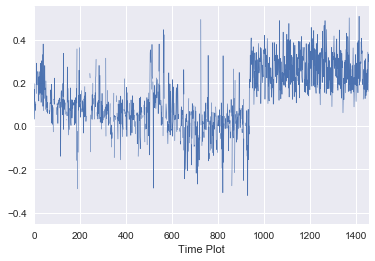

In [22]:
(train_pd.ndvi_ne.plot.line(lw=0.6))
matplt.xlabel('Time Plot')

In [23]:
train_pd.fillna(method='ffill', inplace=True)

In [24]:
panda.isnull(train_pd).any()

city                                     False
year                                     False
weekofyear                               False
ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_t

In [25]:
sj_train_data = train_pd.loc[train_pd["city"] == "sj"]

In [26]:
iq_train_data = train_pd.loc[train_pd["city"] == "iq"]

In [27]:
print ("SJ: ", sj_train_data.shape)

SJ:  (936, 26)


In [28]:
print ("IQ: ", iq_train_data.shape)

IQ:  (520, 26)


In [29]:
sj_train_data["total_cases"].describe()

count    936.000000
mean      34.180556
std       51.381372
min        0.000000
25%        9.000000
50%       19.000000
75%       37.000000
max      461.000000
Name: total_cases, dtype: float64

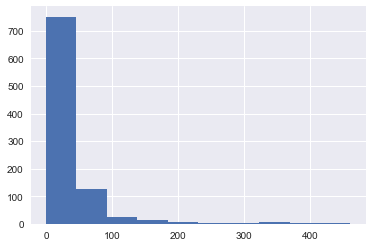

In [30]:
sj_train_data["total_cases"].hist()

In [31]:
iq_train_data["total_cases"].describe()

count    520.000000
mean       7.565385
std       10.765478
min        0.000000
25%        1.000000
50%        5.000000
75%        9.000000
max      116.000000
Name: total_cases, dtype: float64

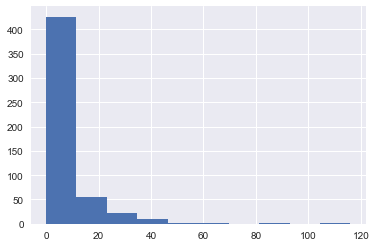

In [32]:
iq_train_data["total_cases"].hist()

In [33]:
sj_corr = sj_train_data.corr()
iq_corr = iq_train_data.corr()

In [34]:
sj_corr

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,month,dayofyear
year,1.000000,-0.073143,-0.388985,-0.495028,0.008188,-0.080679,0.039130,0.188870,0.192929,0.020255,...,0.022695,0.325254,-0.094621,-0.276345,-0.169664,0.000753,0.084859,-0.212690,-0.072749,-0.073177
weekofyear,-0.073143,1.000000,-0.062458,-0.035011,-0.038279,-0.074096,0.236115,0.567984,0.554162,0.572071,...,0.579267,-0.103152,0.480078,-0.140037,0.320370,0.518216,0.214038,0.287134,0.955143,0.955259
ndvi_ne,-0.388985,-0.062458,1.000000,0.614698,0.207491,0.157257,-0.059808,-0.082125,-0.080713,-0.054253,...,-0.051206,-0.018890,0.055838,0.186319,0.102780,0.002738,-0.083680,0.004144,-0.044449,-0.042553
ndvi_nw,-0.495028,-0.035011,0.614698,1.000000,0.188704,0.219810,-0.041504,-0.077612,-0.076369,-0.028381,...,-0.022846,-0.049042,0.088248,0.183969,0.136895,0.017841,-0.083308,0.059208,-0.003976,-0.003417
ndvi_se,0.008188,-0.038279,0.207491,0.188704,1.000000,0.797349,-0.111004,-0.013301,-0.010259,-0.063016,...,-0.058377,0.041177,-0.063100,0.005305,-0.075178,-0.072331,-0.137604,-0.120024,-0.034759,-0.034365
ndvi_sw,-0.080679,-0.074096,0.157257,0.219810,0.797349,1.000000,-0.115206,-0.038681,-0.031778,-0.082374,...,-0.075421,0.052047,-0.035083,0.069963,-0.010211,-0.068595,-0.169807,0.041055,-0.057899,-0.055934
precipitation_amt_mm,0.039130,0.236115,-0.059808,-0.041504,-0.111004,-0.115206,1.000000,0.236147,0.224713,0.404579,...,0.411872,-0.093284,0.198585,-0.158887,0.192706,0.228427,0.567309,0.056942,0.222311,0.228972
reanalysis_air_temp_k,0.188870,0.567984,-0.082125,-0.077612,-0.013301,-0.038681,0.236147,1.000000,0.997502,0.903613,...,0.905102,0.177733,0.880699,0.041772,0.699227,0.832807,0.115062,0.179402,0.583595,0.579600
reanalysis_avg_temp_k,0.192929,0.554162,-0.080713,-0.076369,-0.010259,-0.031778,0.224713,0.997502,1.000000,0.895541,...,0.896541,0.200647,0.878872,0.056190,0.704506,0.827170,0.099347,0.172569,0.568534,0.564770
reanalysis_dew_point_temp_k,0.020255,0.572071,-0.054253,-0.028381,-0.063016,-0.082374,0.404579,0.903613,0.895541,1.000000,...,0.998531,-0.033127,0.868346,-0.054898,0.690219,0.850041,0.286506,0.201086,0.580681,0.578997


In [35]:
iq_corr

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,month,dayofyear
year,1.000000,-0.136842,-0.061312,0.033645,-0.068539,-0.013061,0.087477,0.025900,0.007958,0.318874,...,0.322473,-0.235963,0.080529,-0.118322,0.014077,0.127615,-0.035498,0.179451,-0.148566,-0.148550
weekofyear,-0.136842,1.000000,0.257832,0.226371,0.326793,0.261047,-0.104390,0.287895,0.301060,-0.093272,...,-0.082903,0.345075,0.084278,0.218064,0.189582,-0.093604,-0.045229,-0.011850,0.964308,0.965174
ndvi_ne,-0.061312,0.257832,1.000000,0.764985,0.770023,0.842322,-0.008574,0.153966,0.169574,-0.031774,...,-0.030730,0.169956,0.120930,0.146313,0.142054,-0.007827,0.010807,0.019740,0.250323,0.249176
ndvi_nw,0.033645,0.226371,0.764985,1.000000,0.646231,0.765632,-0.055308,0.152324,0.169079,-0.032951,...,-0.028628,0.165977,0.124745,0.193135,0.149415,-0.090059,-0.016191,-0.010520,0.217392,0.218229
ndvi_se,-0.068539,0.326793,0.770023,0.646231,1.000000,0.714706,-0.038086,0.195719,0.207485,-0.060981,...,-0.058624,0.221448,0.127715,0.174722,0.157924,-0.051418,0.011709,-0.041153,0.319217,0.314472
ndvi_sw,-0.013061,0.261047,0.842322,0.765632,0.714706,1.000000,-0.016022,0.162238,0.175390,-0.030457,...,-0.026808,0.171700,0.120515,0.174293,0.171488,-0.054636,-0.004503,0.031369,0.254643,0.254505
precipitation_amt_mm,0.087477,-0.104390,-0.008574,-0.055308,-0.038086,-0.016022,1.000000,-0.047794,-0.053616,0.473699,...,0.470498,-0.377695,0.128808,-0.162642,-0.001494,0.311626,0.366194,0.089410,-0.134722,-0.129901
reanalysis_air_temp_k,0.025900,0.287895,0.153966,0.152324,0.195719,0.162238,-0.047794,1.000000,0.973444,0.150289,...,0.177061,0.554201,0.592988,0.505441,0.648541,0.240131,-0.136316,0.096666,0.291559,0.294433
reanalysis_avg_temp_k,0.007958,0.301060,0.169574,0.169079,0.207485,0.175390,-0.053616,0.973444,1.000000,0.141053,...,0.165020,0.603975,0.559617,0.504120,0.623551,0.209468,-0.139934,0.080056,0.305686,0.308220
reanalysis_dew_point_temp_k,0.318874,-0.093272,-0.031774,-0.032951,-0.060981,-0.030457,0.473699,0.150289,0.141053,1.000000,...,0.997772,-0.606955,0.338776,-0.227384,0.094725,0.619840,0.184703,0.228864,-0.113634,-0.113064


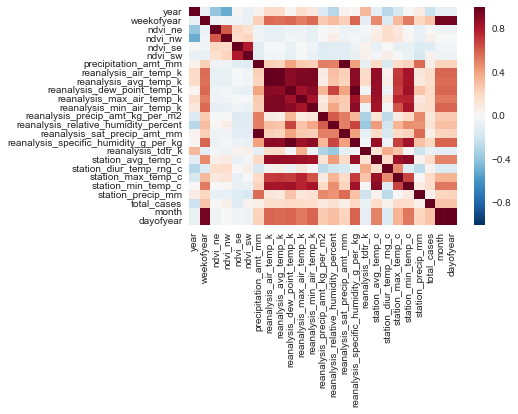

In [36]:
sb.heatmap(sj_corr)

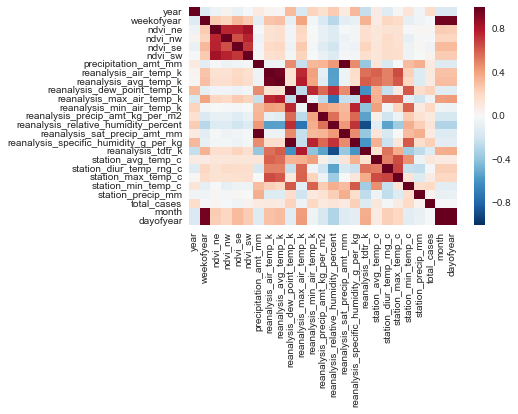

In [37]:
sb.heatmap(iq_corr)

In [38]:
sj_train_data.drop(sj_train_data.columns[[0,1,2]], axis=1, inplace=True)
iq_train_data.drop(iq_train_data.columns[[0,1,2]], axis=1, inplace=True)

C:\Users\dheer\Spark\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\dheer\Spark\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
sj_train_data.drop("dayofyear", axis=1, inplace=True)
iq_train_data.drop("dayofyear", axis=1, inplace=True)

C:\Users\dheer\Spark\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\dheer\Spark\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
sj_corr = sj_train_data.corr()
iq_corr = iq_train_data.corr()

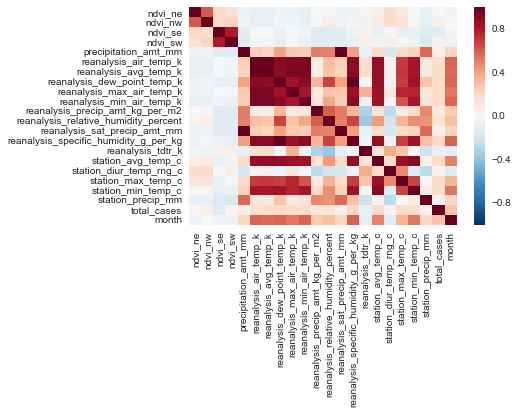

In [41]:
sb.heatmap(sj_corr)

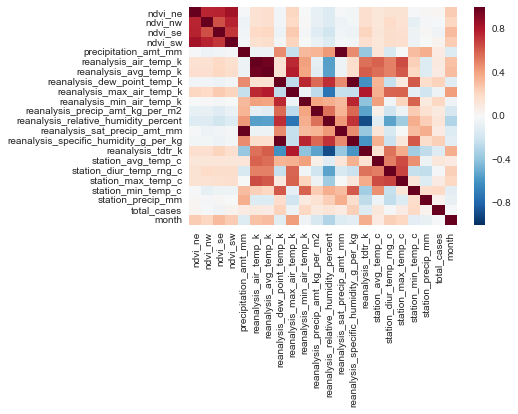

In [42]:
sb.heatmap(iq_corr)

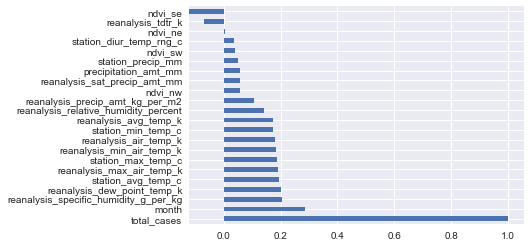

In [43]:
(sj_corr.total_cases.sort_values(ascending=False).plot.barh())

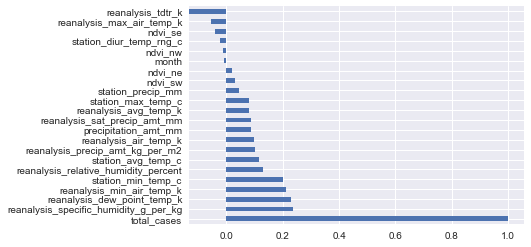

In [44]:
(iq_corr.total_cases.sort_values(ascending=False).plot.barh())

In [45]:
sj_train_data.drop("ndvi_nw", axis=1, inplace=True)
iq_train_data.drop("ndvi_nw", axis=1, inplace=True)

C:\Users\dheer\Spark\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\dheer\Spark\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [46]:
sj_train_data.drop("ndvi_ne", axis=1, inplace=True)
iq_train_data.drop("ndvi_ne", axis=1, inplace=True)

C:\Users\dheer\Spark\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\dheer\Spark\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [47]:
sj_train_data.drop("ndvi_sw", axis=1, inplace=True)
iq_train_data.drop("ndvi_sw", axis=1, inplace=True)

C:\Users\dheer\Spark\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\dheer\Spark\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [48]:
sj_train_data.drop("reanalysis_avg_temp_k", axis=1, inplace=True)
iq_train_data.drop("reanalysis_avg_temp_k", axis=1, inplace=True)

C:\Users\dheer\Spark\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\dheer\Spark\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [49]:
sj_train_data.drop("reanalysis_sat_precip_amt_mm", axis=1, inplace=True)
iq_train_data.drop("reanalysis_sat_precip_amt_mm", axis=1, inplace=True)

C:\Users\dheer\Spark\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\dheer\Spark\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [50]:
sj_train_data.drop("reanalysis_dew_point_temp_k", axis=1, inplace=True)
iq_train_data.drop("reanalysis_dew_point_temp_k", axis=1, inplace=True)

C:\Users\dheer\Spark\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\dheer\Spark\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [51]:
sj_corr = sj_train_data.corr()
iq_corr = iq_train_data.corr()

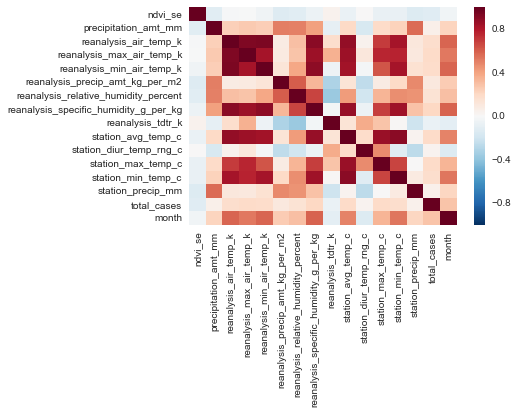

In [52]:
sb.heatmap(sj_corr)

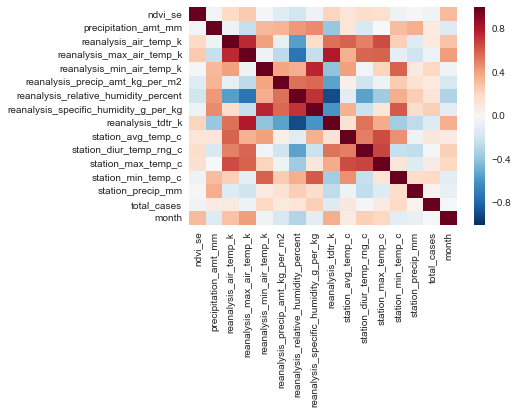

In [53]:
sb.heatmap(iq_corr)

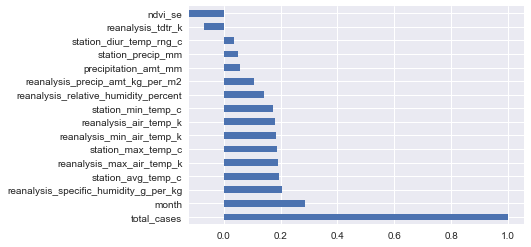

In [54]:
(sj_corr.total_cases.sort_values(ascending=False).plot.barh())

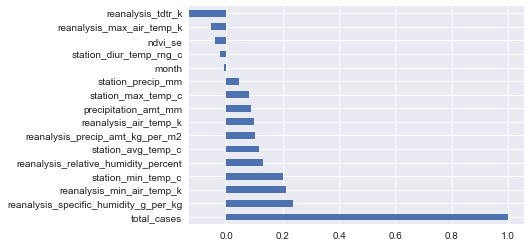

In [55]:
(iq_corr.total_cases.sort_values(ascending=False).plot.barh())

In [56]:
sj_train_data.drop("reanalysis_relative_humidity_percent", axis=1, inplace=True)
iq_train_data.drop("reanalysis_relative_humidity_percent", axis=1, inplace=True)

C:\Users\dheer\Spark\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\dheer\Spark\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [57]:
sj_train_data.drop("reanalysis_precip_amt_kg_per_m2", axis=1, inplace=True)
iq_train_data.drop("reanalysis_precip_amt_kg_per_m2", axis=1, inplace=True)

C:\Users\dheer\Spark\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\dheer\Spark\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [58]:
sj_train_data.drop("station_max_temp_c", axis=1, inplace=True)
iq_train_data.drop("station_max_temp_c", axis=1, inplace=True)

C:\Users\dheer\Spark\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\dheer\Spark\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [59]:
sj_corr = sj_train_data.corr()
iq_corr = iq_train_data.corr()

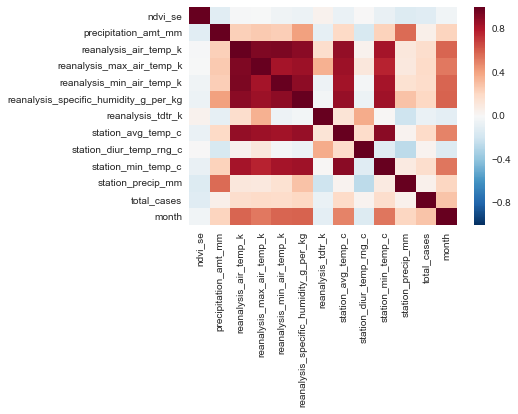

In [60]:
sb.heatmap(sj_corr)

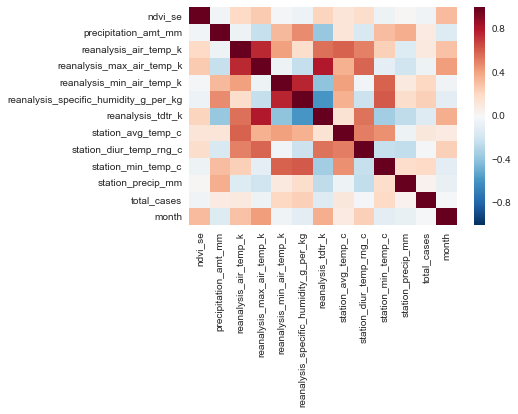

In [61]:
sb.heatmap(iq_corr)

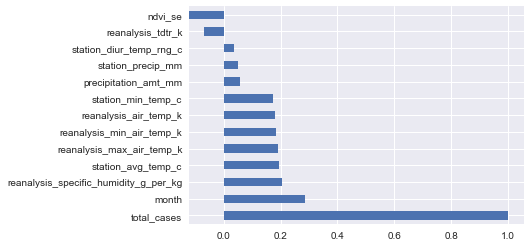

In [62]:
(sj_corr.total_cases.sort_values(ascending=False).plot.barh())

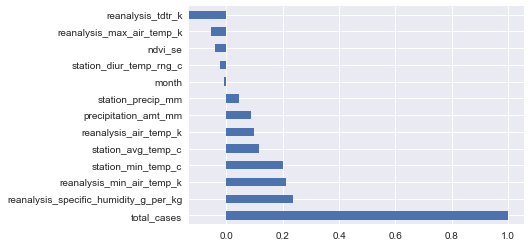

In [63]:
(iq_corr.total_cases.sort_values(ascending=False).plot.barh())